# Mission 2.
'''
이 미션은 다음 데이터 셋을 이용해서 진행되어야합니다.
(https://www.kaggle.com/dannielr/marvel-superheroes?select=charcters_stats.csv)
제출할 파일 : abengers.ipynb

###Core Mission 

다음질문에 답하시오

-캐릭터는 저마다 지능,힘, 등 다양한 수치를 지니고 있다 이러한 $수치의 합이 가장 큰$ 캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라

-좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고 시각화하여라

###Extra Mission
다음 질문에 답하시오

-캐릭터는 저마다 지능 힘 등 다양한 수치를 지니고 있다. 

또한 각 캐릭터는 DC 마블등 다양한 코믹스 회사를 바탕으로 하고 있다 어떤 코믹스 회가의 캐릭터들이 *능력치 합의 평균이 가장 큰*가?

이를 보이기 위한 과정을 보여라

-좋은 캐릭터와 나쁜 캐릭터가 격돌한다고 한다. 격돌하는 경우 캐릭터들의 능력치의 합의 평균이 큰 팀이 이긴다고 한다. 

단, 불의를 못참는 중립 캐릭털들은 중립캐릭터가 없었을 당시에 열세인 팀에 가담한다

이러한 상활일때 결과적으로 어떤 캐릭터 진영이 승리할 것인가? 이를 보이기 위한 과정을 보여라

- 이 데이터를 이용해 진행하고 싶은 EDA 및 시각화가 있다면 자유롭게 진행하여라

- 이과제는 핵심임무 이후에 진행되어야 한다.

'''

mkdir superheroes

cd superheroes

kaggle datasets download -d dannielr/marvel-superheroes

unzip marvel-superheroes.zip 

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [ ]:
superheroes_df = pd.read_csv('./superheroes/charcters_stats.csv')
superheroes_df

### 1. 캐릭터는 저마다 지능,힘, 등 다양한 수치를 지니고 있다 이러한 수치의 합이 가장큰  캐릭터는 누구인가? 이를 보이기 위한 과정을 보여라

In [ ]:
superheroes_df.loc[superheroes_df['Total'].idxmax()]

### 2. 좋은 캐릭터와 나쁜 캐릭터의 능력치들의 수치 분포를 알고 싶다. 이를 표현하기 위한 적절한 그래프를 선택해서 이를 위한 전처리를 진행하고 시각화하여라

In [ ]:
superheroes_df.groupby(['Alignment','Intelligence','Strength','Speed','Durability','Power','Combat'])['Alignment'].count()

In [ ]:
goodhero = superheroes_df.loc[superheroes_df['Alignment'] == 'good']
badhero = superheroes_df.loc[superheroes_df['Alignment'] == 'bad']

In [223]:
#Intelligence
g_Intelligence=(goodhero['Intelligence'].value_counts()/goodhero['Name'].count()).sort_index().reset_index()
b_Intelligence=(badhero['Intelligence'].value_counts()/badhero['Name'].count()).sort_index().reset_index()
#Strength
g_Strength=(goodhero['Strength'].value_counts()/goodhero['Name'].count()).sort_index().reset_index()
b_Strength=(badhero['Strength'].value_counts()/badhero['Name'].count()).sort_index().reset_index()
#Speed
g_Speed=(goodhero['Speed'].value_counts()/goodhero['Name'].count()).sort_index().reset_index()
b_Speed=(badhero['Speed'].value_counts()/badhero['Name'].count()).sort_index().reset_index()
#Durability
g_Durability=(goodhero['Durability'].value_counts()/goodhero['Name'].count()).sort_index().reset_index()
b_Durability=(badhero['Durability'].value_counts()/badhero['Name'].count()).sort_index().reset_index()
#Power
g_Power=(goodhero['Power'].value_counts()/goodhero['Name'].count()).sort_index().reset_index()
b_Power=(badhero['Power'].value_counts()/badhero['Name'].count()).sort_index().reset_index()
#Combat
g_Combat=(goodhero['Combat'].value_counts()/goodhero['Name'].count()).sort_index().reset_index()
b_Combat=(badhero['Combat'].value_counts()/badhero['Name'].count()).sort_index().reset_index()

In [230]:
b_Speed

,index,Speed
0,1,0.312500
1,8,0.023148
2,12,0.064815
3,13,0.002315
4,17,0.011574
5,18,0.002315
6,20,0.004630
7,21,0.004630
8,22,0.002315
9,23,0.108796


색깔 만들기

In [221]:
redcolor = {}
bluecolor = {}
for i in range(0,101):
    redcolor[i] = "#ff{0:02x}{0:02x}".format(int((101-i)/100*255))
    bluecolor[i] = "#{0:02x}{0:02x}ff".format(int((101-i)/100*255))

In [222]:
def badcolorsmaker(indexlist):
    color = []
    for i in indexlist['index']:
        if i > 100 :
            color.append("#000000")
        else:
            color.append(redcolor[i])
    return color
def goodcolorsmaker(indexlist):
    color = []
    for i in indexlist['index']:
        if i > 100 :
            color.append("#000000")
        else:
            color.append(bluecolor[i])
    return color

In [225]:
b_Combat['Combat']

0     0.266667
1     0.012121
2     0.006061
3     0.006061
4     0.090909
5     0.012121
6     0.006061
7     0.012121
8     0.048485
9     0.006061
10    0.018182
11    0.006061
12    0.139394
13    0.030303
14    0.042424
15    0.012121
16    0.048485
17    0.006061
18    0.012121
19    0.012121
20    0.054545
21    0.024242
22    0.042424
23    0.030303
24    0.036364
25    0.018182
Name: Combat, dtype: float64

<ipython-input-235-1b6b55e66482>:7: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[0][0].pie(b_Intelligence['Intelligence'],labels=b_Intelligence['index'], startangle=90, wedgeprops=wedgeprops1, colors=badcolorsmaker(b_Intelligence),labeldistance=0.5)
<ipython-input-235-1b6b55e66482>:8: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax[0][0].pie(g_Intelligence['Intelligence'],labels=g_Intelligence['index'],startangle=90, wedgeprops=wedgeprops2, labeldistance=0.8,colors=goodcolorsmaker(g_Intelligence))
<ipython-input-2

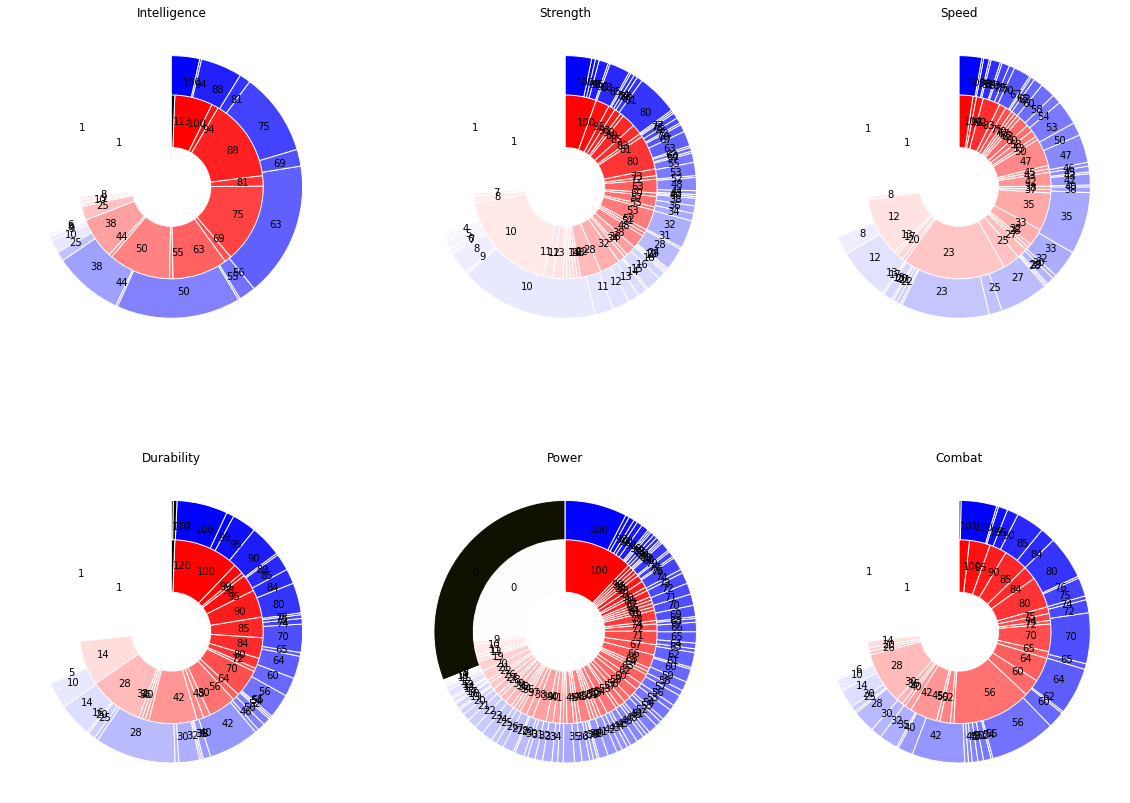

In [235]:
fig, ax =plt.subplots(2,3, figsize=(20, 15))

wedgeprops1={'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}
wedgeprops2={'width': 0.3, 'edgecolor': 'w', 'linewidth': 1}
# 0,0 Intelligence
ax[0,0].set_title('Intelligence')
ax[0][0].pie(b_Intelligence['Intelligence'],labels=b_Intelligence['index'], startangle=90, wedgeprops=wedgeprops1, colors=badcolorsmaker(b_Intelligence),labeldistance=0.5)
ax[0][0].pie(g_Intelligence['Intelligence'],labels=g_Intelligence['index'],startangle=90, wedgeprops=wedgeprops2, labeldistance=0.8,colors=goodcolorsmaker(g_Intelligence))
#0,1 Strength
ax[0,1].set_title('Strength')
ax[0][1].pie(b_Strength['Strength'],labels=b_Strength['index'], startangle=90, wedgeprops=wedgeprops1, colors=badcolorsmaker(b_Strength),labeldistance=0.5)
ax[0][1].pie(g_Strength['Strength'],labels=g_Strength['index'],startangle=90, wedgeprops=wedgeprops2, labeldistance=0.8,colors=goodcolorsmaker(g_Strength))
#0,2 Speed
ax[0,2].set_title('Speed')
ax[0][2].pie(b_Speed['Speed'],labels=b_Speed['index'], startangle=90, wedgeprops=wedgeprops1, colors=badcolorsmaker(b_Speed),labeldistance=0.5)
ax[0][2].pie(g_Speed['Speed'],labels=g_Speed['index'],startangle=90, wedgeprops=wedgeprops2, labeldistance=0.8,colors=goodcolorsmaker(g_Speed))
#1,0 Durability
ax[1,0].set_title('Durability')
ax[1][0].pie(b_Durability['Durability'],labels=b_Durability['index'], startangle=90, wedgeprops=wedgeprops1, colors=badcolorsmaker(b_Durability),labeldistance=0.5)
ax[1][0].pie(g_Durability['Durability'],labels=g_Durability['index'],startangle=90, wedgeprops=wedgeprops2, labeldistance=0.8,colors=goodcolorsmaker(g_Durability))
#1,1 Power
ax[1,1].set_title('Power')
ax[1][1].pie(b_Power['Power'],labels=b_Power['index'], startangle=90, wedgeprops=wedgeprops1, colors=badcolorsmaker(b_Power),labeldistance=0.5)
ax[1][1].pie(g_Power['Power'],labels=g_Power['index'],startangle=90, wedgeprops=wedgeprops2, labeldistance=0.8,colors=goodcolorsmaker(g_Power))
#1,2 Combat
ax[1,2].set_title('Combat')
ax[1][2].pie(b_Combat['Combat'],labels=b_Combat['index'], startangle=90, wedgeprops=wedgeprops1, colors=badcolorsmaker(b_Combat),labeldistance=0.5)
ax[1][2].pie(g_Combat['Combat'],labels=g_Combat['index'],startangle=90, wedgeprops=wedgeprops2, labeldistance=0.8,colors=goodcolorsmaker(g_Combat))
plt.show()